In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import plotly.offline as po
import plotly.graph_objs as go
from plotly import tools

# Contents


1. The datasets
2. Patient
3. Tumour <br/>
&nbsp; 3.1  merge av_tumour and av_patient
4. sact_regimen
5. sact_tumour <br/>
&nbsp; 5.1  merge sact_tumour sact_regimen
6. sact_outcome <br/>
&nbsp; 6.1 merge sact_outcome and sact_regimen
7. sact_cycle
8. sact_patient
9. sact_drug_detail
10. Patient pathway/single view of patient <br/>
&nbsp; 10.1 merging all datasets <br/>
&nbsp; 10.2 patient pathways <br/>

# 1. The datasets

This is a table of all the columns in each dataset, there are a lot so it might be useful to see all of them in one table

**can scroll this table left/right**

In [25]:
datadict = pd.ExcelFile('Simulacrum-data-dictionary.xlsx')
sheets = datadict.sheet_names[1:]
DF = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(datadict,sheet)
    df[sheet] = df['Field name']
    DF = pd.concat([DF,df[sheet]], axis=1)

DF

,AV_PATIENT,AV_TUMOUR,SACT PATIENT,SACT TUMOUR,SACT REGIMEN,SACT OUTCOME,SACT CYCLE,SACT DRUG_DETAIL
0,PATIENTID,TUMOURID,MERGED_PATIENT_ID,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,MERGED_OUTCOME_ID,MERGED_CYCLE_ID,MERGED_DRUG_DETAIL_ID
1,SEX,PATIENTID,LINK_NUMBER,MERGED_PATIENT_ID,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,MERGED_REGIMEN_ID,MERGED_CYCLE_ID
2,LINKNUMBER,DIAGNOSISDATEBEST,NaN,CONSULTANT_SPECIALITY_CODE,HEIGHT_AT_START_OF_REGIMEN,DATE_OF_FINAL_TREATMENT,CYCLE_NUMBER,ORG_CODE_OF_DRUG_PROVIDER
3,ETHNICITY,SITE_ICD10_O2,NaN,PRIMARY_DIAGNOSIS,WEIGHT_AT_START_OF_REGIMEN,REGIMEN_MOD_DOSE_REDUCTION,START_DATE_OF_CYCLE,ACTUAL_DOSE_PER_ADMINISTRATION
4,DEATHCAUSECODE_1A,SITE_ICD10_O2_3CHAR,NaN,MORPHOLOGY_CLEAN,INTENT_OF_TREATMENT,REGIMEN_MOD_TIME_DELAY,OPCS_PROCUREMENT_CODE,OPCS_DELIVERY_CODE
5,DEATHCAUSECODE_1B,MORPH_ICD10_O2,NaN,NaN,DATE_DECISION_TO_TREAT,REGIMEN_MOD_STOPPED_EARLY,PERF_STATUS_START_OF_CYCLE,ADMINISTRATION_ROUTE
6,DEATHCAUSECODE_1C,BEHAVIOUR_ICD10_O2,NaN,NaN,START_DATE_OF_REGIMEN,REGIMEN_OUTCOME_SUMMARY,MERGED_PATIENT_ID,ADMINISTRATION_DATE
7,DEATHCAUSECODE_2,T_BEST,NaN,NaN,MAPPED_REGIMEN,MERGED_PATIENT_ID,MERGED_TUMOUR_ID,DRUG_GROUP
8,DEATHCAUSECODE_UNDERLYING,N_BEST,NaN,NaN,CLINICAL_TRIAL,MERGED_TUMOUR_ID,NaN,MERGED_PATIENT_ID
9,DEATHLOCATIONCODE,M_BEST,NaN,NaN,CHEMO_RADIATION,NaN,NaN,MERGED_TUMOUR_ID


Diagram of how the datasets are linked:

<img src="tablestructure.jpeg" alt="ts" width="500"/>

# 2. Patient

In [26]:
av_patient = pd.read_csv('simulacrum_release_v1.1.0/sim_av_patient.csv')
display(av_patient.head())

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE
0,10000001,2,810000001,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17
1,10000002,2,810000002,Z,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-14
2,10000003,1,810000003,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17
3,10000004,1,810000004,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-13
4,10000005,2,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16


unique vital status dates:

In [27]:
av_patient["VITALSTATUSDATE"].apply(lambda s: s[0:4]).value_counts()

2017    982336
2015    116384
2016     92416
2014     84727
2013     46206
1900        31
Name: VITALSTATUSDATE, dtype: int64

frequency of each death cause:

[Text(0,0,'deathcause')]

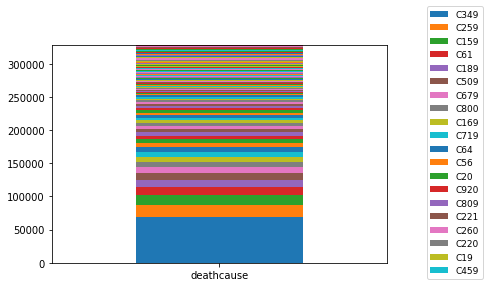

In [28]:
vc = av_patient['DEATHCAUSECODE_UNDERLYING'].value_counts()
ax = pd.DataFrame(vc).T.plot.bar(stacked=True)
handles, labels = ax.get_legend_handles_labels()
top20index = [labels.index(v) for v in vc[:20].keys()]
top20handles = [handles[i] for i in top20index]
ax.legend(top20handles, vc[:20].keys(),loc='best', bbox_to_anchor=(0.8, 0.7, 0.5, 0.5),prop={'size':9})
ax.set_xticklabels(labels=['deathcause'],rotation=0)

### invalid:
non null `"DEATHCAUSECODE_UNDERLYING"` and `"NEWVITALSTATUS" != "D"`:

In [29]:
dead_alive = av_patient[(av_patient["DEATHCAUSECODE_UNDERLYING"].notnull()) \
                        & (av_patient["NEWVITALSTATUS"] != "D")]
len(dead_alive)

179511

# 3. Tumour

In [6]:
av_tumour = pd.read_csv('simulacrum_release_v1.1.0/sim_av_tumour.csv',low_memory=False)
display(av_tumour.head())
print(av_tumour.shape)

,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,...,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


(1402817, 34)


Unique diagnosis years:

In [31]:
av_tumour["DIAGNOSISDATEBEST"].apply(lambda s: s[0:4]).value_counts()

2015    473666
2014    467145
2013    462006
Name: DIAGNOSISDATEBEST, dtype: int64

Making some bar plots of the tumour features, colour coded with the tumour site:

In [7]:
tumour_features = av_tumour[['SITE_ICD10_O2_3CHAR', 'BEHAVIOUR_ICD10_O2', 'T_BEST',
                            'N_BEST', 'M_BEST', 'STAGE_BEST', 'STAGE_BEST_SYSTEM', 'GRADE', 'AGE',
                            'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS', 'ACE27','LATERALITY']]
vc = av_tumour['SITE_ICD10_O2_3CHAR'].value_counts()
vc[:20] #top20tumoursites

C44    350130
C50    133907
C61    119347
C34    102350
D06     76678
C18     65825
C43     38155
C20     27163
C64     26195
D09     25193
C67     24643
C54     21849
C25     21344
C15     20996
D05     19777
C83     18264
D03     17123
C56     16939
C16     15298
C90     13504
Name: SITE_ICD10_O2_3CHAR, dtype: int64

In [4]:
def Stackedbarformat(df,col1,col2):
    """Organizes the dataframe in a format that you can plot a
    stacked bar plot from it"""
    
    #Get dataframe of col1,col2 and frequency of people with that col1/col2
    df = df[[col1,col2]] \
                .groupby([col2, col1]) \
                .agg({col1:'size'}) \
                .rename(columns={col1:'count'}) \
                .reset_index()
    
    #pivot the table in the correct format for a stacked bar plot
    df = df.pivot(index=col2, columns=col1)['count']
    return df

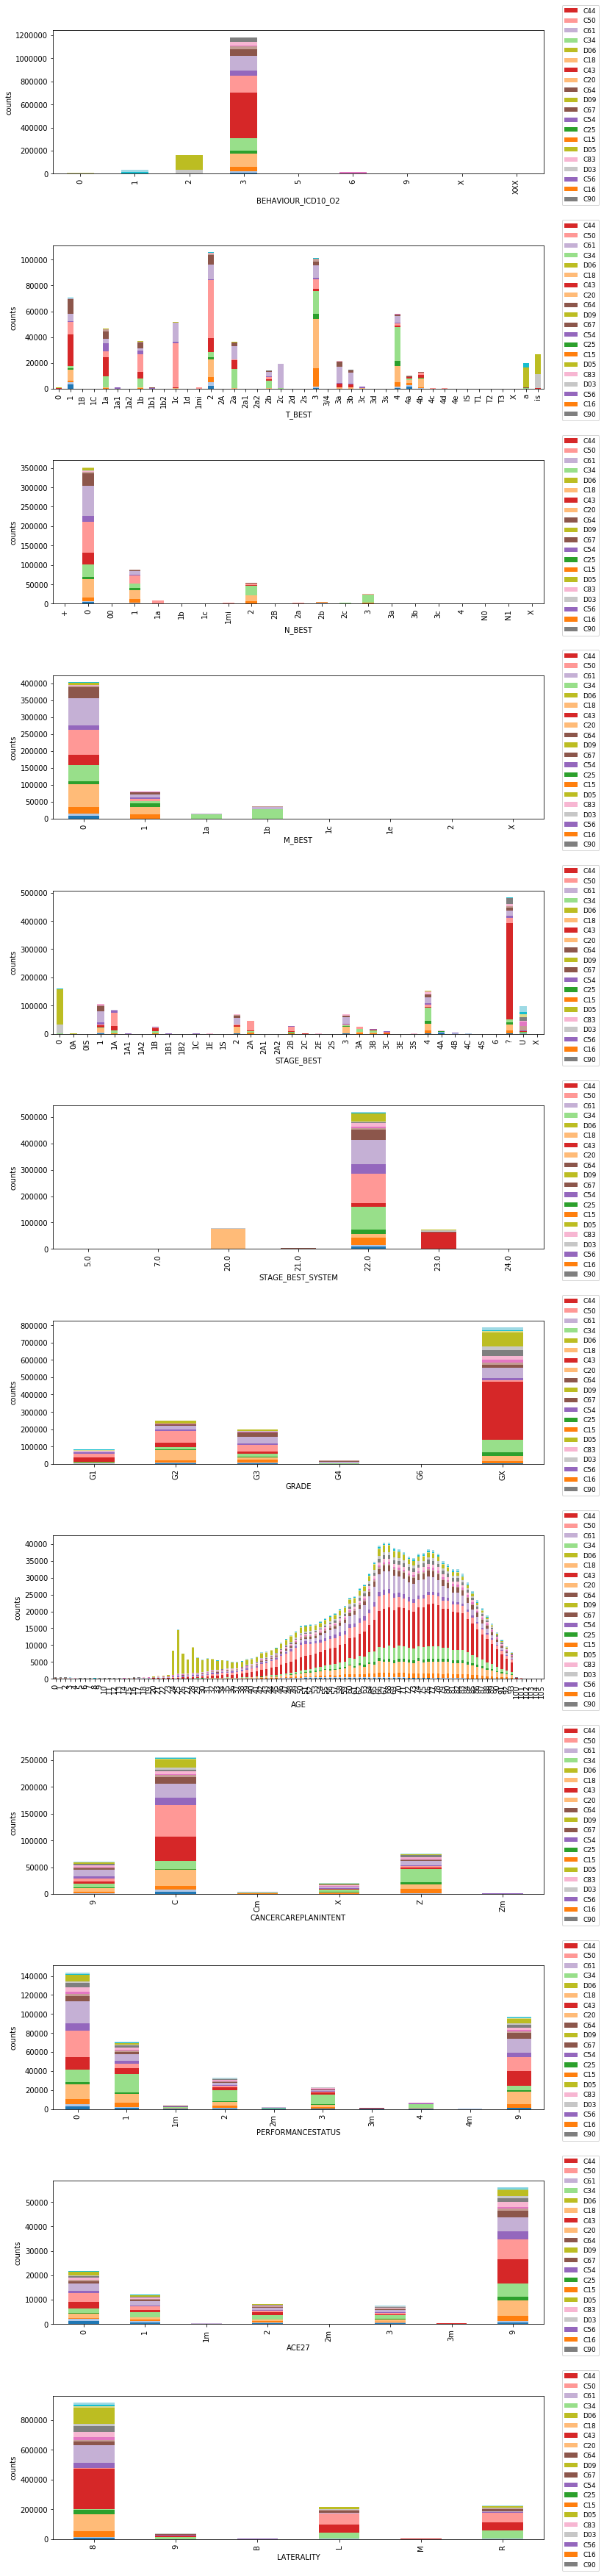

In [34]:
tf_keys = list(tumour_features.keys())
tf_keys.remove('SITE_ICD10_O2_3CHAR')
fig, axes = plt.subplots(nrows=len(tf_keys), ncols=1, figsize=(10,4*len(tf_keys)))
fig.tight_layout()

for i,col in enumerate(tf_keys):
    
    feature = Stackedbarformat(tumour_features, 'SITE_ICD10_O2_3CHAR', col)
    
    #plot the stacked bar plots
    ax = feature.plot(kind='bar', stacked=True, ax=axes[i], colormap='tab20')
    handles, labels = ax.get_legend_handles_labels()
    top20index = [labels.index(v) for v in vc[:20].keys()]
    top20handles = [handles[i] for i in top20index]
    ax.legend(top20handles, vc[:20].keys(),loc='best', bbox_to_anchor=(0.62, 0.7, 0.5, 0.5),prop={'size':9})
    ax.set_ylabel('counts')
    
plt.subplots_adjust(hspace=0.5)

The colours in these plots are the site of the tumour, the legend only shows the top 20 sites

incorrect 3 letter ICD10 codes

In [35]:
incorrect = av_tumour['SITE_ICD10_O2'].apply(lambda s: str(s)[0:3]) \
            != av_tumour['SITE_ICD10_O2_3CHAR']
print(incorrect.value_counts())
display(av_tumour[incorrect].tail())


False    1348656
True       54161
dtype: int64


,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,...,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
1402811,220052217,220023092,2014-09-30,C160,C44,8312,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
1402812,220052218,220023285,2015-09-03,C313,C34,8140,3,1a,0,0,...,NaN,Y1,NaN,NaN,NaN,NaN,NaN,NaN,R,2
1402814,220052225,220045122,2015-01-30,D075,D01,8140,2,NaN,NaN,NaN,...,0,99,NaN,NaN,NaN,NaN,NaN,2015-02-07,8,2
1402815,220052228,220010521,2015-11-02,C051,C61,8000,3,NaN,2,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,5 - most deprived
1402816,220052229,220014422,2015-10-27,C441,C64,8046,3,2a,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,5 - most deprived


### 3.1 Plotly plot example

how to plot stacked bar chart: https://plot.ly/python/bar-charts/#stacked-bar-chart

In [12]:
#plot in notebook
po.init_notebook_mode(connected=True)

col = 'AGE'

fig = go.Figure()
feature = Stackedbarformat(tumour_features, 'SITE_ICD10_O2_3CHAR', col)
index = feature.index
data = []

for site in feature.keys():

    trace = go.Bar(
            x=index,
            y=feature[site],
            name=site)

    data.append(trace)
    
layout = go.Layout(barmode='stack',hovermode='closest',
                xaxis=dict(title='AGE'), yaxis=dict(title="count"))
fig = go.Figure(data=data, layout=layout)

po.iplot(fig,filename='example_plotly')

### 3.2 merge av_tumour and av_patient

In [37]:
tumour_patient = pd.merge(av_tumour,av_patient,on='PATIENTID')
print(av_tumour.shape,av_patient.shape,tumour_patient.shape) 

(1402817, 34) (1322100, 12) (1402817, 45)


create column with days between date of vital status taken and date of diagnosis

In [38]:
from datetime import date

diagnosis_dates = pd.to_datetime(tumour_patient['DIAGNOSISDATEBEST'])
vitalstat_dates = pd.to_datetime(tumour_patient['VITALSTATUSDATE'])

tumour_patient['VITAL - DIAGNOSIS (days)'] = vitalstat_dates - diagnosis_dates
tumour_patient['VITAL - DIAGNOSIS (days)'] = [i.days for i in tumour_patient['VITAL - DIAGNOSIS (days)']]
tumour_patient = tumour_patient[tumour_patient['VITAL - DIAGNOSIS (days)'] >= 0] #some have vital status in 1900

print("stats for days being alive")
tumour_patient['VITAL - DIAGNOSIS (days)'].describe()

stats for days being alive


count    1.402784e+06
mean     7.674820e+02
std      4.079234e+02
min      0.000000e+00
25%      4.660000e+02
50%      7.690000e+02
75%      1.105000e+03
max      1.484000e+03
Name: VITAL - DIAGNOSIS (days), dtype: float64

plots of mean days alive from patients that died

In [39]:
dead_patient = tumour_patient[tumour_patient['NEWVITALSTATUS'] == 'D']

time_behav = dead_patient[dead_patient['BEHAVIOUR_ICD10_O2'] != 'XXX'].dropna(subset=['BEHAVIOUR_ICD10_O2'])
time_behav['BEHAVIOUR_ICD10_O2'] = time_behav['BEHAVIOUR_ICD10_O2'].astype(int)
time_behav['VITAL - DIAGNOSIS (days)'] = time_behav['VITAL - DIAGNOSIS (days)'].astype(float)
mean_days_alive = time_behav[['SITE_ICD10_O2_3CHAR','BEHAVIOUR_ICD10_O2' , 'VITAL - DIAGNOSIS (days)']] \
                    .groupby(['SITE_ICD10_O2_3CHAR','BEHAVIOUR_ICD10_O2']) \
                    .agg({'SITE_ICD10_O2_3CHAR':'size', 'VITAL - DIAGNOSIS (days)':'mean'}) \
                    .rename(columns={'SITE_ICD10_O2_3CHAR':'site count','VITAL - DIAGNOSIS (days)':'mean days alive'}) \
                    .reset_index()

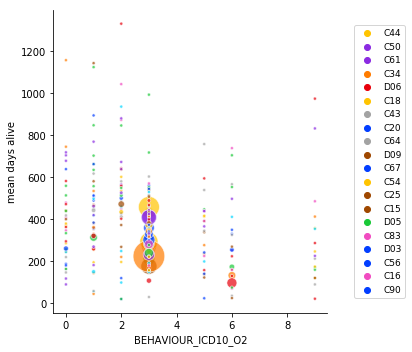

In [40]:
p = sns.relplot(x="BEHAVIOUR_ICD10_O2", y="mean days alive", hue="SITE_ICD10_O2_3CHAR", size="site count",
            sizes=(10, 1000), alpha=.7,
            height=5, data=mean_days_alive, palette='bright')
handles, labels = p.ax.get_legend_handles_labels()
top20index = [labels.index(v) for v in vc[:20].keys()]
top20handles = [handles[i] for i in top20index]
p.ax.legend(top20handles, vc[:20].keys(),loc='right', bbox_to_anchor=(0.8, 0.25, 0.5, 0.5),prop={'size':9})
p._legend.remove()

On the legend is the top 20 tumour

Different colors mean different tumour sites

The sizes of the blobs represent the number of people who have that tumour

There isn't a clear correlation between the time alive and the behaviour of the tumour(how bad the tumour is)

# 4. Sact_regimen

https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python - loading sim_sact_regimen

there are multiple regimens for some tumours

In [41]:
sact_regimen = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_regimen.csv',encoding="ISO-8859-1")
print(sact_regimen.shape)
display(sact_regimen.head())

(471919, 12)


,MERGED_REGIMEN_ID,MERGED_TUMOUR_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID,BENCHMARK_GROUP
0,10000001,10000001,-1.0,NaN,N,2015-03-08,2015-03-08,DEGARELIX,NaN,N,10000235,HORMONES
1,10000002,10000002,NaN,NaN,P,2016-07-09,2016-07-10,BICALUTAMIDE + GOSERELIN,NaN,N,10000315,HORMONES
2,10000003,10000003,NaN,NaN,P,2014-01-09,2014-01-09,EXEMESTANE,02,N,10000337,HORMONES
3,10000004,10000004,NaN,NaN,NaN,2015-03-17,2015-03-23,Rituximab,N,NaN,10000480,RITUXIMAB
4,10000005,10000005,0.0,NaN,C,2012-12-30,2013-03-11,Hydroxycarbamide,N,N,10000533,HYDROXYCARBAMIDE


# 5. Sact_tumour

tumours that have received systemic anti-cancer therapy

In [42]:
sact_tumour = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_tumour.csv')
sact_tumour.head()

,MERGED_TUMOUR_ID,MERGED_PATIENT_ID,CONSULTANT_SPECIALITY_CODE,PRIMARY_DIAGNOSIS,MORPHOLOGY_CLEAN
0,10000001,10000235,101.0,C61,81403.0
1,10000002,10000315,101.0,C679,81403.0
2,10000003,10000337,100.0,C500,NaN
3,10000004,10000480,303.0,C829,NaN
4,10000005,10000533,823.0,D473,NaN


### 5.1 merge sact_tumour sact_regimen

In [43]:
tumour_regimen = pd.merge(sact_tumour,sact_regimen,on='MERGED_TUMOUR_ID')
print(sact_tumour.shape, sact_regimen.shape, tumour_regimen.shape) 

(299727, 5) (471919, 12) (471919, 16)


In [44]:
tumour_regimen

,MERGED_TUMOUR_ID,MERGED_PATIENT_ID_x,CONSULTANT_SPECIALITY_CODE,PRIMARY_DIAGNOSIS,MORPHOLOGY_CLEAN,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP
0,10000001,10000235,101.0,C61,81403.0,10000001,-1.00,NaN,N,2015-03-08,2015-03-08,DEGARELIX,NaN,N,10000235,HORMONES
1,10000002,10000315,101.0,C679,81403.0,10000002,NaN,NaN,P,2016-07-09,2016-07-10,BICALUTAMIDE + GOSERELIN,NaN,N,10000315,HORMONES
2,10000003,10000337,100.0,C500,NaN,10000003,NaN,NaN,P,2014-01-09,2014-01-09,EXEMESTANE,02,N,10000337,HORMONES
3,10000004,10000480,303.0,C829,NaN,10000004,NaN,NaN,NaN,2015-03-17,2015-03-23,Rituximab,N,NaN,10000480,RITUXIMAB
4,10000005,10000533,823.0,D473,NaN,10000005,0.00,NaN,C,2012-12-30,2013-03-11,Hydroxycarbamide,N,N,10000533,HYDROXYCARBAMIDE
5,10000006,10000697,823.0,C833,96803.0,10000006,1.78,NaN,C,2011-07-23,2012-05-14,CHOP R - 21 days,N,N,10000697,CHOP R
6,10000006,10000697,823.0,C833,96803.0,10000007,1.75,58.5,D,2014-07-24,2014-07-25,Rituximab,N,NaN,10000697,RITUXIMAB
7,10000007,10000966,101.0,C61,81403.0,10000009,NaN,81.4,N,2013-12-09,2013-12-10,BICALUTAMIDE,N,N,10000966,HORMONES
8,10000008,10000997,823.0,D471,99623.0,10000010,1.61,100.0,P,2014-12-09,2015-01-02,Hydroxycarbamide,NaN,N,10000997,HYDROXYCARBAMIDE
9,10000009,10001068,100.0,C509,85003.0,10000011,NaN,-1.0,P,2014-07-22,2014-07-23,ANASTRAZOLE,02,N,10001068,HORMONES


Text(0,0.5,'counts')

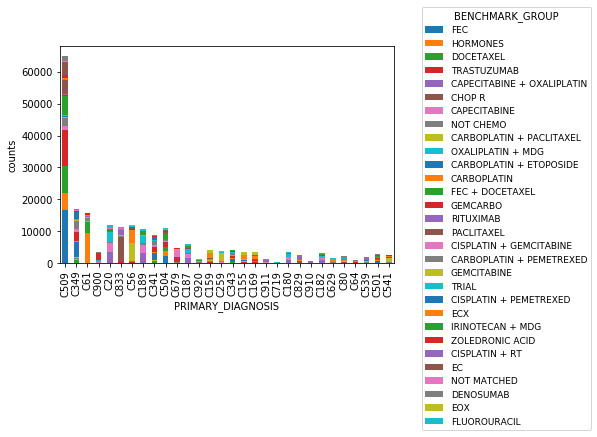

In [45]:
regimen_feature = Stackedbarformat(tumour_regimen,'BENCHMARK_GROUP', 'PRIMARY_DIAGNOSIS')

#top30 diagnosis
vcdiagnosis = tumour_regimen['PRIMARY_DIAGNOSIS'].value_counts()
regimen_feature = regimen_feature.loc[list(vcdiagnosis[:30].keys())]

#top30 regimens
vc = tumour_regimen['BENCHMARK_GROUP'].value_counts()
topreg = regimen_feature[list(vc[:30].keys())]

ax = topreg.plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.1, 0.7, 0.5, 0.5),prop={'size':9}, title = 'BENCHMARK_GROUP')
ax.set_ylabel('counts')


This is a frequency plot of primary diagnosis of patients with the different colours as the BENCHMARK_GROUP(type of regimen i think) given to that patient.

this only shows the top 30 PRIMARY_DIAGNOSIS and top 30 BENCHMARK_GROUP

# 6. sact_outcome

In [46]:
sact_outcome = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_outcome.csv')
sact_outcome.head()

,MERGED_OUTCOME_ID,MERGED_REGIMEN_ID,DATE_OF_FINAL_TREATMENT,REGIMEN_MOD_DOSE_REDUCTION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,MERGED_PATIENT_ID,MERGED_TUMOUR_ID
0,10000001,10000003,2014-01-09,N,N,N,NaN,10000337,10000003
1,10000002,10000005,NaN,Y,Y,N,NaN,10000533,10000005
2,10000003,10000006,NaN,N,Y,N,NaN,10000697,10000006
3,10000004,10000007,NaN,Y,NaN,N,NaN,10000697,10000006
4,10000005,10000008,2012-12-07,NaN,NaN,NaN,NaN,10000773,10009036


In [47]:
sact_outcome.shape

(351668, 9)

### 6.1 merge sact_outcome and sact_regimen

In [48]:
outcome_regimen = pd.merge(sact_regimen,sact_outcome,on='MERGED_REGIMEN_ID')
print(sact_outcome.shape, sact_regimen.shape, outcome_regimen.shape) 

(351668, 9) (471919, 12) (351668, 20)


In [49]:
outcome_regimen

,MERGED_REGIMEN_ID,MERGED_TUMOUR_ID_x,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_x,BENCHMARK_GROUP,MERGED_OUTCOME_ID,DATE_OF_FINAL_TREATMENT,REGIMEN_MOD_DOSE_REDUCTION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,MERGED_PATIENT_ID_y,MERGED_TUMOUR_ID_y
0,10000003,10000003,NaN,NaN,P,2014-01-09,2014-01-09,EXEMESTANE,02,N,10000337,HORMONES,10000001,2014-01-09,N,N,N,NaN,10000337,10000003
1,10000005,10000005,0.00,NaN,C,2012-12-30,2013-03-11,Hydroxycarbamide,N,N,10000533,HYDROXYCARBAMIDE,10000002,NaN,Y,Y,N,NaN,10000533,10000005
2,10000006,10000006,1.78,NaN,C,2011-07-23,2012-05-14,CHOP R - 21 days,N,N,10000697,CHOP R,10000003,NaN,N,Y,N,NaN,10000697,10000006
3,10000007,10000006,1.75,58.50,D,2014-07-24,2014-07-25,Rituximab,N,NaN,10000697,RITUXIMAB,10000004,NaN,Y,NaN,N,NaN,10000697,10000006
4,10000008,10009036,NaN,78.00,C,2012-12-07,2012-12-07,LEUPRORELIN,99,N,10000773,HORMONES,10000005,2012-12-07,NaN,NaN,NaN,NaN,10000773,10009036
5,10000009,10000007,NaN,81.40,N,2013-12-09,2013-12-10,BICALUTAMIDE,N,N,10000966,HORMONES,10000006,2013-12-10,NaN,NaN,NaN,NaN,10000966,10000007
6,10000010,10000008,1.61,100.00,P,2014-12-09,2015-01-02,Hydroxycarbamide,NaN,N,10000997,HYDROXYCARBAMIDE,10000007,2016-08-08,N,N,N,NaN,10000997,10000008
7,10000011,10000009,NaN,-1.00,P,2014-07-22,2014-07-23,ANASTRAZOLE,02,N,10001068,HORMONES,10000008,2014-07-23,NaN,NaN,NaN,NaN,10001068,10000009
8,10000012,10000010,NaN,58.00,NaN,NaN,2011-08-02,Hydroxycarbamide,N,N,10001085,HYDROXYCARBAMIDE,10000009,NaN,Y,NaN,NaN,NaN,10001085,10000010
9,10000013,10000011,0.00,NaN,P,2015-10-24,2015-10-24,Hydroxycarbamide,N,NaN,10001194,HYDROXYCARBAMIDE,10000010,2015-11-28,NaN,NaN,NaN,NaN,10001194,10000011


Text(0,0.5,'counts')

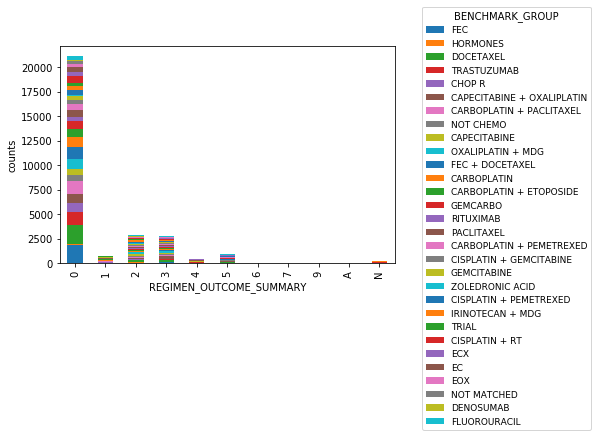

In [50]:
regimen_feature = Stackedbarformat(outcome_regimen,'BENCHMARK_GROUP', 'REGIMEN_OUTCOME_SUMMARY')

vc = outcome_regimen['BENCHMARK_GROUP'].value_counts()
topreg = regimen_feature[list(vc[:30].keys())]
ax = topreg.plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.1, 0.7, 0.5, 0.5),prop={'size':9}, title = 'BENCHMARK_GROUP')
ax.set_ylabel('counts')

This is a frequency plot of REGIMEN_OUTCOME_SUMMARY with the different colours as the BENCHMARK_GROUP.

# 7. sact_cycle

In [51]:
sact_cycle = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_cycle.csv', low_memory=False)
display(sact_cycle.head())

print('shape ',sact_cycle.shape)

for col in list(sact_cycle.columns):
    print(col," ",sact_cycle[col].unique()[0:6])

,MERGED_CYCLE_ID,MERGED_REGIMEN_ID,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,MERGED_PATIENT_ID,MERGED_TUMOUR_ID
0,10000001,10000001,4,2015-06-07,NaN,NaN,10000235,10000001
1,10000002,10000002,2,2016-08-07,NaN,00,10000315,10000002
2,10000003,10000003,3,NaN,X715,NaN,10000337,10000003
3,10000004,10000004,2,2015-03-23,X712,0,10000480,10000004
4,10000005,10000005,1,2013-03-11,X711,NaN,10000533,10000005


shape  (1462099, 8)
MERGED_CYCLE_ID   [10000001 10000002 10000003 10000004 10000005 10000006]
MERGED_REGIMEN_ID   [10000001 10000002 10000003 10000004 10000005 10000006]
CYCLE_NUMBER   [ 4  2  3  1  5 11]
START_DATE_OF_CYCLE   ['2015-06-07' '2016-08-07' nan '2015-03-23' '2013-03-11' '2012-06-29']
OPCS_PROCUREMENT_CODE   [nan 'X715' 'X712' 'X711' 'X713' 'X702']
PERF_STATUS_START_OF_CYCLE   [nan '00' '0' '1' '-1' '2']
MERGED_PATIENT_ID   [10000235 10000315 10000337 10000480 10000533 10000697]
MERGED_TUMOUR_ID   [10000001 10000002 10000003 10000004 10000005 10000006]


# 8. sact_patient

In [52]:
sact_patient = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_patient.csv')
display(sact_patient.head())

print('shape ',sact_patient.shape)


,MERGED_PATIENT_ID,LINK_NUMBER
0,10000087,810000087
1,10000235,810000235
2,10000283,810000283
3,10000315,810000315
4,10000337,810000337


shape  (245938, 2)


# 9. sact_drug_detail

In [53]:
drug_detail = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_drug_detail.csv')
display(drug_detail.head())

,MERGED_DRUG_DETAIL_ID,MERGED_CYCLE_ID,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP,MERGED_PATIENT_ID,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID
0,10000001,10000001,EKD02,10.0,NaN,1.0,2015-06-07,STEROID,10000235,10000001,10000001
1,10000002,10000002,EGU02,30.0,NaN,2.0,NaN,NOT CHEMO,10000315,10000002,10000002
2,10000003,10000003,EGU05,1000.0,NaN,1.0,NaN,RITUXIMAB,10000337,10000003,10000003
3,10000004,10000004,EXO,8.0,X723,2.0,2015-03-23,NOT CHEMO,10000480,10000004,10000004
4,10000005,10000005,ETD02,1000.0,NaN,2.0,2013-03-11,NOT CHEMO,10000533,10000005,10000005


In [54]:
drugs = drug_detail['DRUG_GROUP'].unique()
sorted(drugs)

['ABIRATERONE',
 'ACELARIN',
 'ADI-PEG 20',
 'AFATINIB',
 'AFLIBERCEPT',
 'ALDESLEUKIN',
 'ALEMTUZUMAB',
 'AMSACRINE',
 'ANAGRELIDE',
 'ANASTROZOLE',
 'ARSENIC TRIOXIDE',
 'ASPARAGINASE',
 'ATEZOLIZUMAB',
 'ATG',
 'AVELUMAB',
 'AXITINIB',
 'AZACITIDINE',
 'BCG',
 'BENDAMUSTINE',
 'BEVACIZUMAB',
 'BEXAROTENE',
 'BICALULTAMIDE',
 'BICALUTAMIDE',
 'BLEOMYCIN',
 'BLINATUMOMAB',
 'BORTEZOMIB',
 'BOSUTINIB',
 'BRENTUXIMAB',
 'BRENTUXIMAB VEDOTIN',
 'BUSULFAN',
 'CABAZITAXEL',
 'CABOZANTINIB',
 'CALCIUM FOLINATE',
 'CAPECITABINE',
 'CARBOPLATIN',
 'CARFILZOMIB',
 'CARMUSTINE',
 'CEDIRANIB',
 'CERITINIB',
 'CETIRIZINE',
 'CETRORELIX ACETATE',
 'CETUXIMAB',
 'CHLORAMBUCIL',
 'CISPLATIN',
 'CLADRIBINE',
 'CLOFARABINE',
 'COPANLISIB',
 'CRIZOTINIB',
 'CYCLOPHOSPHAMIDE',
 'CYPROTERONE',
 'CYTARABINE',
 'DABRAFENIB',
 'DACARBAZINE',
 'DACTINOMYCIN',
 'DARATUMUMAB',
 'DARBOPOETIN',
 'DASATINIB',
 'DAUNORUBICIN',
 'DECITABINE',
 'DEGARELIX',
 'DENOSUMAB',
 'DEXAMETHASONE',
 'DEXRAZOXANE (SAVENE)',
 '

there are some repeated drugs due to spelling mistakes e.g.  'GEMTUZUMAB OZOGAMICIN' 'GEMTUZUMAB OZOGAMYCIN'

# 10. Patient pathway/single view of patient

## 10.1 merging all the datasets

All the datasets are merged starting from `av_patient`. `av_tumour` has been excluded for now.

All merges are an inner join.

Only patients that has undertaken a regimen are kept in the end because patients without a regimen are not joined in an inner join.

The order of merging shouldn't matter as long as the datasets are merged according to the table structure in 1.

Rows will be repeated if the number of rows grows on a merge.

In [55]:
# Merge av_patient,sact_patient 
sact_patient = sact_patient.rename(index=str,columns={'LINK_NUMBER':'LINKNUMBER'})
patient_link = pd.merge(av_patient,
                        sact_patient,on='LINKNUMBER')

# Merge sact_tumour
patient_tumour = pd.merge(patient_link, 
                          sact_tumour,on='MERGED_PATIENT_ID')

# Merge sact_regimen
patient_tumour_regimen = pd.merge(patient_tumour, 
                                  sact_regimen,on='MERGED_TUMOUR_ID')

#Merge sact_outcome
patient_tumour_regimen_outcome = pd.merge(patient_tumour_regimen, 
                                          sact_outcome,on='MERGED_REGIMEN_ID')

#Merge sact_cycle
patient_tumour_regimen_outcome_cycle = pd.merge(patient_tumour_regimen_outcome, 
                                                sact_cycle,on='MERGED_REGIMEN_ID')

#Merge drug_detail
patient_tumour_regimen_outcome_cycle_drug = pd.merge(patient_tumour_regimen_outcome_cycle
                                                     ,drug_detail,on='MERGED_CYCLE_ID')


In [56]:
pd.set_option('display.max_columns', 100)

#example patient
p = patient_tumour_regimen_outcome_cycle_drug['PATIENTID'] == 10000283
display(patient_tumour_regimen_outcome_cycle_drug[p])

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,MERGED_PATIENT_ID_x,MERGED_TUMOUR_ID_x,CONSULTANT_SPECIALITY_CODE,PRIMARY_DIAGNOSIS,MORPHOLOGY_CLEAN,MERGED_REGIMEN_ID_x,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,MERGED_OUTCOME_ID,DATE_OF_FINAL_TREATMENT,REGIMEN_MOD_DOSE_REDUCTION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,MERGED_PATIENT_ID_x,MERGED_TUMOUR_ID_y,MERGED_CYCLE_ID,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,MERGED_PATIENT_ID_y,MERGED_TUMOUR_ID_x,MERGED_DRUG_DETAIL_ID,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP,MERGED_PATIENT_ID,MERGED_TUMOUR_ID_y,MERGED_REGIMEN_ID_y
0,10000283,1,810000283,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000283,10011465,101.0,C61,NaN,10007970,1.66,83.1,C,2016-02-02,2016-02-02,Docetaxel 75mg/m2 (21 day),02,Y,10000283,DOCETAXEL,10007108,NaN,N,N,N,NaN,10000283,10011465,10007967,1,2016-02-02,X702,1,10000283,10011465,10006484,EZ1,60.0,NaN,2.0,2016-02-02,CHLORAMBUCIL,10000283,10011465,10007970
1,10000283,1,810000283,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000283,10011465,101.0,C61,NaN,10007970,1.66,83.1,C,2016-02-02,2016-02-02,Docetaxel 75mg/m2 (21 day),02,Y,10000283,DOCETAXEL,10007108,NaN,N,N,N,NaN,10000283,10011465,10007967,1,2016-02-02,X702,1,10000283,10011465,10038413,EJQ,20.0,NaN,99.0,2016-02-02,CARBOPLATIN,10000283,10011465,10007970
2,10000283,1,810000283,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000283,10011465,101.0,C61,NaN,10007971,0.00,-1.0,A,2014-06-29,2014-07-01,ZOLEDRONIC ACID,N,N,10000283,ZOLEDRONIC ACID,10007109,NaN,N,NaN,N,NaN,10000283,10011465,10007968,1,2014-07-22,NaN,0,10000283,10011465,10006485,ETG,10.0,NaN,2.0,2014-07-22,CHLORAMBUCIL,10000283,10011465,10007971
3,10000283,1,810000283,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000283,10011465,101.0,C61,NaN,10007972,1.72,NaN,NaN,NaN,2014-10-30,Chlorambucil,N,N,10000283,FLUOROURACIL + MITOMYCIN + RT,10007110,NaN,N,NaN,N,NaN,10000283,10011465,10007969,1,2014-10-30,X715,1,10000283,10011465,10006486,EON,20.0,NaN,2.0,2014-10-30,NOT CHEMO,10000283,10011465,10007972
4,10000283,1,810000283,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000283,10011465,101.0,C61,NaN,10007972,1.72,NaN,NaN,NaN,2014-10-30,Chlorambucil,N,N,10000283,FLUOROURACIL + MITOMYCIN + RT,10007110,NaN,N,NaN,N,NaN,10000283,10011465,10016625,2,2014-11-27,NaN,1,10000283,10011465,10013931,ED8Y0,1000.0,X741,2.0,2014-11-27,ABIRATERONE,10000283,10011465,10007972
5,10000283,1,810000283,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000283,10011465,101.0,C61,NaN,10007972,1.72,NaN,NaN,NaN,2014-10-30,Chlorambucil,N,N,10000283,FLUOROURACIL + MITOMYCIN + RT,10007110,NaN,N,NaN,N,NaN,10000283,10011465,10022236,4,2014-12-04,X715,NaN,10000283,10011465,10018828,EGENG,600.0,X723,1.0,2014-12-04,RITUXIMAB,10000283,10011465,10007972
6,10000283,1,810000283,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000283,10011465,101.0,C61,NaN,10007972,1.72,NaN,NaN,NaN,2014-10-30,Chlorambucil,N,N,10000283,FLUOROURACIL + MITOMYCIN + RT,10007110,NaN,N,NaN,N,NaN,10000283,10011465,10026280,4,2014-12-18,NaN,NaN,10000283,10011465,10022327,E1UZ0,430.0,X731,2.0,2014-12-18,CYCLOPHOSPHAMIDE,10000283,10011465,10007972
7,10000283,1,810000283,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000283,10011465,101.0,C61,NaN,10007972,1.72,NaN,NaN,NaN,2014-10-30,Chlorambucil,N,N,10000283,FLUOROURACIL + MITOMYCIN + RT,10007110,NaN,N,NaN,N,NaN,10000283,10011465,10026280,4,2014-12-18,NaN,NaN,10000283,10011465,10059364,EAD51,1000.0,X723,99.0,2014-12-18,RITUXIMAB,10000283,10011465,10007972
8,10000283,1,810000283,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000283,10011465,101.0,C61,NaN,10007972,1.72,NaN,NaN,NaN,2014-10-30,

explanation of the changes in the number of rows when merging each dataset:

In [57]:
merges = [av_patient, 
          patient_link, 
# includes only patients that have undergone a regimen => decrease in rows.
          
          patient_tumour, 
# some tumours might have to be "rediagnosed" before starting a new regimen 
# => increase in rows.
# from looking at sact_tumour/sact_regimen, multiple MERGED_TUMOUR_ID's on 
# a single patient does not necessarily correspond to different tumours on that 
# patient. Instead, a Regimen(s) will correspond to each MERGED_TUMOUR_ID, 
# I think this is because they have to rediagnose the tumour before the start of
# a regimen(s).
          
          patient_tumour_regimen, 
# some patients have multiple regimens on a tumour => increase in rows.
          
          patient_tumour_regimen_outcome, 
# some patients have no recorded outcome? => decrease in rows.
          
          patient_tumour_regimen_outcome_cycle, 
# some regimens have multiple cycles => increase in rows
          
          patient_tumour_regimen_outcome_cycle_drug] 
# some cycles have multiple drug details => increase in rows.

for df in merges:
    print(df.shape)

(1322100, 12)
(245938, 13)
(299722, 17)
(471912, 28)
(351661, 36)
(1097360, 43)
(2666148, 53)


## 10.2 Patient pathways

As all the data are combined, we can now order all the dates for each patient to create a patient pathway. This takes 10 minutes to run though.

For a given `'PATIENTID'` sort the dates by `'START_DATE_OF_REGIMEN'` then sort by `'START_DATE_OF_CYCLE'` then sort by `'ADMINISTRATION_DATE'`:

In [ ]:
#%%time
#patient_pathways = patient_tumour_regimen_outcome_cycle_drug \
#                    .groupby('PATIENTID') \
#                    .apply(lambda x: x.sort_values(by = 
#                                    ['START_DATE_OF_REGIMEN','START_DATE_OF_CYCLE','ADMINISTRATION_DATE'])) 
#patient_pathways = patient_pathways.reset_index(level=1, drop=True)
#patient_pathways.to_pickle('patient_pathways.pkl')

groupby and sort : https://github.com/pandas-dev/pandas/issues/15947

sort dataframe by date: https://stackoverflow.com/questions/28161356/sort-pandas-dataframe-by-date

as sorting the dataframe takes 10 minutes, the dataframe has just been saved so that you can load it in:

In [58]:
patient_pathways = pd.read_pickle('patient_pathways.pkl')
patient_pathways = patient_pathways.drop(columns=['PATIENTID',
                                                  'MERGED_PATIENT_ID_x',
                                                  'MERGED_TUMOUR_ID_x',
                                                  'MERGED_REGIMEN_ID_x',
                                                  'MERGED_PATIENT_ID_y',
                                                  'MERGED_OUTCOME_ID',
                                                  'MERGED_PATIENT_ID_y',
                                                  'MERGED_TUMOUR_ID_y',
                                                  'MERGED_CYCLE_ID',
                                                  'MERGED_DRUG_DETAIL_ID',
                                                  'MERGED_PATIENT_ID',
                                                  'MERGED_REGIMEN_ID_y',
                                                  'LINKNUMBER'])

#example patient:
patient_pathways.xs(10000283)

,SEX,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,CONSULTANT_SPECIALITY_CODE,PRIMARY_DIAGNOSIS,MORPHOLOGY_CLEAN,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,DATE_OF_FINAL_TREATMENT,REGIMEN_MOD_DOSE_REDUCTION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP
PATIENTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000283,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,101.0,C61,NaN,0.00,-1.0,A,2014-06-29,2014-07-01,ZOLEDRONIC ACID,N,N,ZOLEDRONIC ACID,NaN,N,NaN,N,NaN,1,2014-07-22,NaN,0,ETG,10.0,NaN,2.0,2014-07-22,CHLORAMBUCIL
10000283,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,101.0,C61,NaN,1.72,NaN,NaN,NaN,2014-10-30,Chlorambucil,N,N,FLUOROURACIL + MITOMYCIN + RT,NaN,N,NaN,N,NaN,1,2014-10-30,X715,1,EON,20.0,NaN,2.0,2014-10-30,NOT CHEMO
10000283,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,101.0,C61,NaN,1.72,NaN,NaN,NaN,2014-10-30,Chlorambucil,N,N,FLUOROURACIL + MITOMYCIN + RT,NaN,N,NaN,N,NaN,2,2014-11-27,NaN,1,ED8Y0,1000.0,X741,2.0,2014-11-27,ABIRATERONE
10000283,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,101.0,C61,NaN,1.72,NaN,NaN,NaN,2014-10-30,Chlorambucil,N,N,FLUOROURACIL + MITOMYCIN + RT,NaN,N,NaN,N,NaN,4,2014-12-04,X715,NaN,EGENG,600.0,X723,1.0,2014-12-04,RITUXIMAB
10000283,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,101.0,C61,NaN,1.72,NaN,NaN,NaN,2014-10-30,Chlorambucil,N,N,FLUOROURACIL + MITOMYCIN + RT,NaN,N,NaN,N,NaN,4,2014-12-18,NaN,NaN,E1UZ0,430.0,X731,2.0,2014-12-18,CYCLOPHOSPHAMIDE
10000283,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,101.0,C61,NaN,1.72,NaN,NaN,NaN,2014-10-30,Chlorambucil,N,N,FLUOROURACIL + MITOMYCIN + RT,NaN,N,NaN,N,NaN,4,2014-12-18,NaN,NaN,EAD51,1000.0,X723,99.0,2014-12-18,RITUXIMAB
10000283,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,101.0,C61,NaN,1.72,NaN,NaN,NaN,2014-10-30,Chlorambucil,N,N,FLUOROURACIL + MITOMYCIN + RT,NaN,N,NaN,N,NaN,5,2015-01-08,NaN,1,EAD51,5.0,NaN,2.0,2015-01-08,TRIAL
10000283,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,101.0,C61,NaN,1.66,83.1,C,2016-02-02,2016-02-02,Docetaxel 75mg/m2 (21 day),02,Y,DOCETAXEL,NaN,N,N,N,NaN,1,2016-02-02,X702,1,EZ1,60.0,NaN,2.0,2016-02-02,CHLORAMBUCIL
10000283,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,101.0,C61,NaN,1.66,83.1,C,2016-02-02,2016-02-02,Docetaxel 75mg/m2 (21 day),02,Y,DOCETAXEL,NaN,N,N,N,NaN,1,2016-02-02,X702,1,EJQ,20.0,NaN,99.0,2016-02-02,CARBOPLATIN


In [ ]:
#now to choose what columns to keep to get a single view of patient

Which collumns don't have a lot of NaNs?

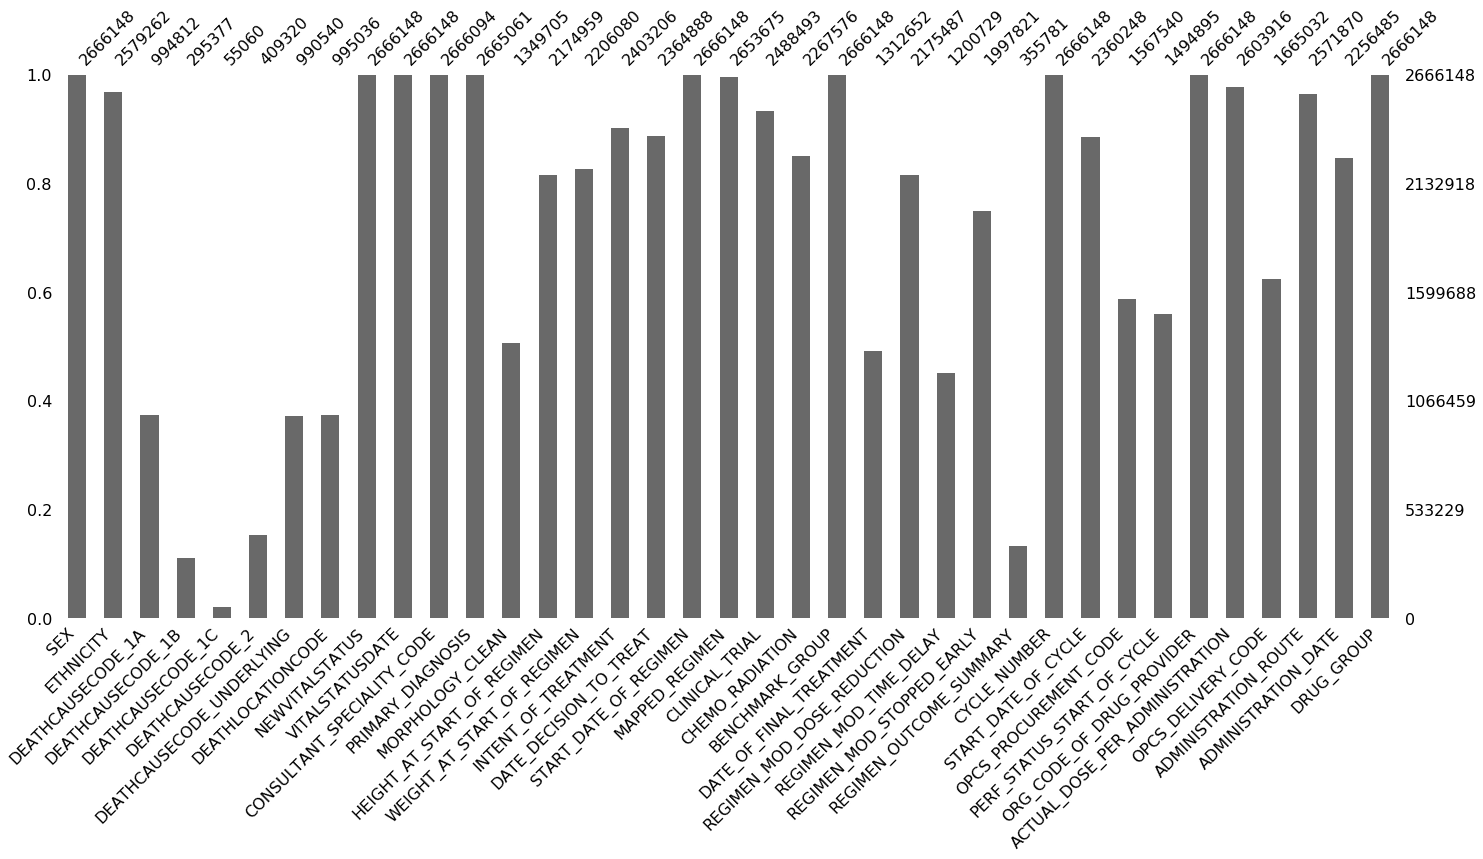

In [102]:
import missingno as msno

#plots the number of not NaN in each column
msno.bar(patient_pathways)